In [1]:
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import os

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 8
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ALL_DIR = os.path.join(ROOT_DIR, "data", "All.csv")


In [2]:
def multi_line_plot_resonance(list, title):

    color_list = ["red", "lawngreen", "gold", "dodgerblue", "blueviolet", "magenta", "slategray", "black", "midnightblue", "darkgreen", "saddlebrown", "lightcoral"]
    fig, ax = plt.subplots(figsize=(25, 2.5))

    ax.locator_params(axis="x", nbins=12)
    beginning = dt.date(2021, 11, 1)
    end = dt.date(2023,1,1)
    date_start = dt.date(2022,4,1)

    for data, color in zip(list, color_list):
        ax.plot(
            data.index.values,
            data["Resonance"],
            color="black",
            linewidth=1,
            alpha=0.3,
        )

    ax.vlines(x=[date_start], ymin=-2.5, ymax=2.5, color="k", linewidth=1.5, linestyle=":")

    ax.set(
        title=title,
        xbound=(beginning, end),
        ylim=[-1, 1.0001],
    )

    date_form = DateFormatter("%b-%y")
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks([-1,0,1])

    ticks = [tick for tick in ax.xaxis.get_majorticklabels()]
    ticks[0].set_horizontalalignment("left")

    return fig

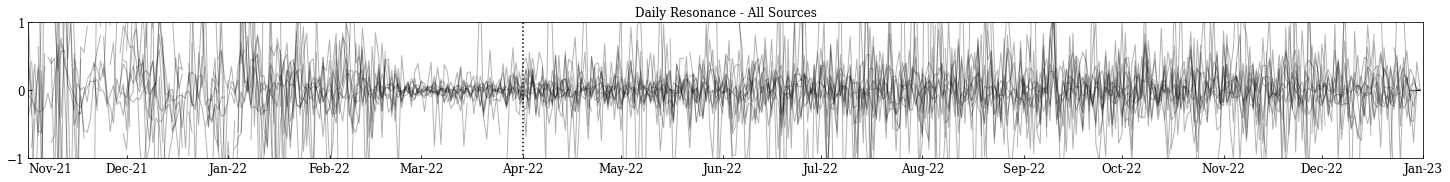

In [3]:
sources = ["ABC","AP","CBS","CNN","DailyMail","Express","Fox","Guardian","Mirror","NYT","Reuters"] # ,"All"

data_dfs = [pd.read_csv(os.path.join(ROOT_DIR, "results_1", i + "_Results.csv"), parse_dates=["Date"], index_col=["Date"]) for i in sources]
davg_dfs = [data_df.drop(columns=["Title", "Text", "URL", "Topic"]).resample("D").mean() for data_df in data_dfs]
windows=[5]

for window in windows:
    fig = multi_line_plot_resonance(davg_dfs, "Daily Resonance - All Sources")
    fig.savefig(os.path.join(ROOT_DIR, "figures","resonance_series", f"Multiline_{window}.svg"), format="svg", dpi=1000, bbox_inches="tight")
